<a href="https://colab.research.google.com/github/bushrahyderi/DL_Assignment/blob/main/Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Flatten, Dense

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

#one hot encode the labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

#RNN expects sequential data, so we treat each row of the image as a time step
timesteps = x_train.shape[1]
input_dim = x_train.shape[2]

#Build the RNN model
model = Sequential([
    SimpleRNN(128, input_shape=(timesteps, input_dim), activation='relu'), Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy:.2f}")

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.6680 - loss: 0.9508 - val_accuracy: 0.9383 - val_loss: 0.2023
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - accuracy: 0.9323 - loss: 0.2285 - val_accuracy: 0.9467 - val_loss: 0.1815
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.9459 - loss: 0.1855 - val_accuracy: 0.9559 - val_loss: 0.1493
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.9598 - loss: 0.1428 - val_accuracy: 0.9564 - val_loss: 0.1454
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.9604 - loss: 0.1335 - val_accuracy: 0.9632 - val_loss: 0.1238
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.9645 - loss: 0.1230 - val_accuracy: 0.9717 - val_loss: 0.1031
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.9710 - loss: 0.1007 - val_accuracy: 0.9682 - val_loss: 0.1102
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.9708 - loss: 0.1008 - 

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.0000e+00 - loss: 2.1802
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 1.0000 - loss: 1.5743
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 1.0000 - loss: 1.1433
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 1.0000 - loss: 0.7817
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 1.0000 - loss: 0.4986
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 1.0000 - loss: 0.2758
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 1.0000 - loss: 0.1245
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 1.0000 - loss: 0.0457
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 1.0000 - loss: 0.0131
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 1.0000 - loss: 0.0028
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
Predictions: [[1.8684690e-05 2.0307007e-05 9.9983474e-05 9.9956220e-01 2.9758144e-06
  3.1078533e-05 6.3609541e-06 2.5564909e-04

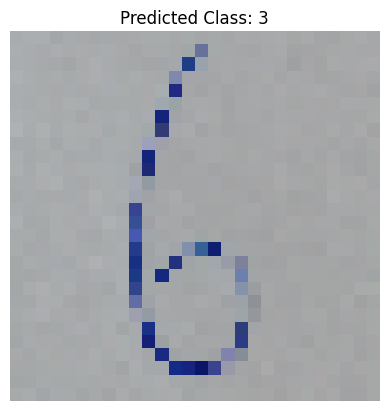

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Load the RGB image
img_path = '/content/num.jpg'
img = image.load_img(img_path, target_size=(28, 28), color_mode='rgb')  # RGB mode
x = image.img_to_array(img)

x = x.reshape(1, 28, 28, 3)  # Update shape for RGB

y = np.array([3])

# One-hot encode the label (for classification with 10 possible classes)
y = to_categorical(y, num_classes=10)

x = x / 255.0  # Normalize pixel values

# Build the RNN model
model = Sequential([
    SimpleRNN(128, input_shape=(x.shape[1], x.shape[2] * x.shape[3]), activation='relu'),  # Flatten RGB channels
    Dense(100, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Reshape x to match the expected input for RNN (merging color channels into width dimension)
x_rnn_input = x.reshape(1, 28, 28 * 3)

history = model.fit(x_rnn_input, y, epochs=10, verbose=1)

predictions = model.predict(x_rnn_input)

# Find the predicted class
predicted_class = np.argmax(predictions, axis=-1)[0]

print(f"Predictions: {predictions}")
print(f"Predicted Class: {predicted_class}")

accuracy = history.history['accuracy'][-1]
print(f"Final Accuracy: {accuracy * 100:.2f}%")

plt.imshow(x.reshape(28, 28, 3))  # Display the RGB image
plt.title(f"Predicted Class: {predicted_class}")
plt.axis('off')
plt.show()


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, BatchNormalization, Dense, Dropout

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0


x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

timesteps = x_train.shape[1]
input_dim = x_train.shape[2]

model = Sequential([
    # Simple RNN layer
    SimpleRNN(128, input_shape=(timesteps, input_dim), activation='relu', return_sequences=True),
    BatchNormalization(),  #normalize the activations
    Dropout(0.25),  # Dropout layer for regularization

    # Another RNN layer
    SimpleRNN(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.25),

    # Fully connected layer
    Dense(64, activation='relu'),
    Dropout(0.5),

    # Output layer
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy:.2f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 33s 38ms/step - accuracy: 0.5574 - loss: 1.3622 - val_accuracy: 0.9323 - val_loss: 0.2190
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 38ms/step - accuracy: 0.9190 - loss: 0.2996 - val_accuracy: 0.9394 - val_loss: 0.2154
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 28s 38ms/step - accuracy: 0.9478 - loss: 0.2017 - val_accuracy: 0.9607 - val_loss: 0.1547
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 29s 38ms/step - accuracy: 0.9575 - loss: 0.1700 - val_accuracy: 0.9707 - val_loss: 0.1059
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 29s 38ms/step - accuracy: 0.9599 - loss: 0.1559 - val_accuracy: 0.9661 - val_loss: 0.1336
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 29s 38ms/step - accuracy: 0.9669 - loss: 0.1316 - val_accuracy: 0.9707 - val_loss: 0.1185
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 38ms/step - accuracy: 0.9685 - loss: 0.1284 - val_accuracy: 0.9683 - val_loss: 0.1160
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 43s 40ms/step - accuracy: 0.9694 - loss: 0.1282 - 

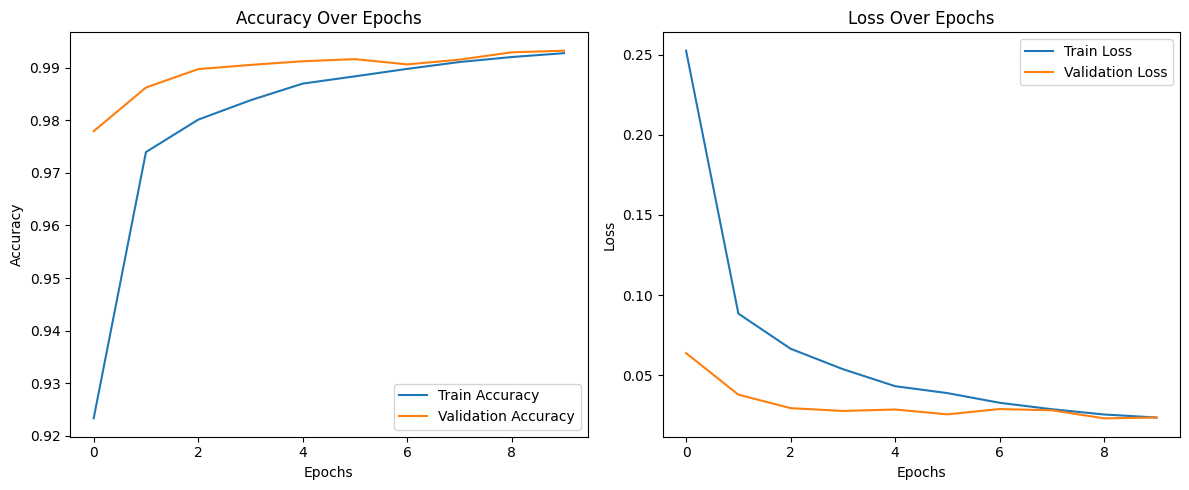

313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 44ms/step


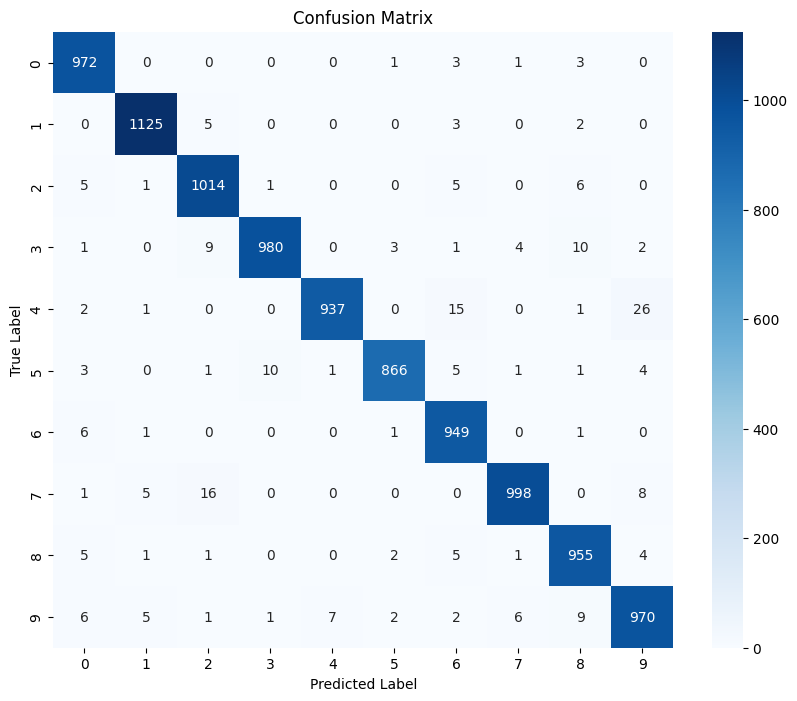

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Plot training and validation accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Confusion Matrix for Model's Predictions
y_pred = np.argmax(model.predict(x_test), axis=1)  # Get predicted class labels
y_true = np.argmax(y_test, axis=1)  # True labels

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
